# Applying Simple Gaussian Process 

A short description of this dataset: It records 7 days’ electricity demands of a city in Australia. Each entry is a half-hour demand; therefore, there are 48 entries each day.

You can try various GP models and test their prediction capabilities (taking out some entries, for example, as testing dataset), or combine these data, using other days’ data to predict a different day or a fraction of this day. I would like you to explore both the GP method and this dataset and to see what are the interesting features you could find out.

In [23]:
import pandas as pd
df = pd.read_csv("7_days_electricity_demand.csv")
df.head()

,Unnamed: 0,1,2,3,4,5,6,7
0,1,1463,1398,1406,1495,1523,1533,1507
1,2,1487,1433,1434,1513,1544,1539,1498
2,3,1409,1372,1371,1453,1468,1470,1427
3,4,1311,1281,1287,1351,1382,1368,1324
4,5,1214,1198,1200,1262,1278,1275,1235


In [24]:
df

,Unnamed: 0,1,2,3,4,5,6,7
0,1,1463,1398,1406,1495,1523,1533,1507
1,2,1487,1433,1434,1513,1544,1539,1498
2,3,1409,1372,1371,1453,1468,1470,1427
3,4,1311,1281,1287,1351,1382,1368,1324
4,5,1214,1198,1200,1262,1278,1275,1235
5,6,1133,1128,1126,1191,1198,1192,1156
6,7,1070,1074,1074,1131,1140,1139,1103
7,8,1004,1030,1027,1077,1086,1085,1070
8,9,968,996,979,1046,1054,1053,1023
9,10,934,975,954,1014,1029,1030,993


In [25]:
df.describe()

,Unnamed: 0,1,2,3,4,5,6,7
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,24.50,1198.208333,1367.625000,1408.833333,1471.166667,1490.208333,1440.145833,1307.125000
std,14.00,206.807029,188.412136,221.975879,220.335849,221.805930,192.797213,176.337639
min,1.00,903.000000,967.000000,953.000000,1014.000000,1014.000000,1025.000000,986.000000
25%,12.75,1068.500000,1299.000000,1283.250000,1361.500000,1400.750000,1372.500000,1212.750000
50%,24.50,1134.000000,1413.500000,1482.000000,1539.500000,1554.500000,1496.000000,1307.500000
75%,36.25,1392.500000,1482.250000,1517.750000,1585.500000,1640.750000,1560.000000,1442.500000
max,48.00,1564.000000,1669.000000,1755.000000,1816.000000,1787.000000,1717.000000,1614.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  48 non-null     int64
 1   1           48 non-null     int64
 2   2           48 non-null     int64
 3   3           48 non-null     int64
 4   4           48 non-null     int64
 5   5           48 non-null     int64
 6   6           48 non-null     int64
 7   7           48 non-null     int64
dtypes: int64(8)
memory usage: 3.1 KB


In [19]:
df

,Unnamed: 0,1,2,3,4,5,6,7
0,1,1463,1398,1406,1495,1523,1533,1507
1,2,1487,1433,1434,1513,1544,1539,1498
2,3,1409,1372,1371,1453,1468,1470,1427
3,4,1311,1281,1287,1351,1382,1368,1324
4,5,1214,1198,1200,1262,1278,1275,1235
5,6,1133,1128,1126,1191,1198,1192,1156
6,7,1070,1074,1074,1131,1140,1139,1103
7,8,1004,1030,1027,1077,1086,1085,1070
8,9,968,996,979,1046,1054,1053,1023
9,10,934,975,954,1014,1029,1030,993


Applying RBF, Constant Kernel, Rational Quadratic, White Kernel, ExpSineSquared, Dot Product

In [27]:
# Importing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic as RQ, WhiteKernel, ExpSineSquared as Exp, DotProduct as Lin

In [28]:
# Importing Dataset
np.random.seed(1)
df = pd.read_csv("7_days_electricity_demand.csv")

In [29]:
df_array = np.asarray(df)

In [30]:
Day_1 = df_array[0:48, 1]
Day_2 = df_array[0:48, 2]
Day_3 = df_array[0:48, 3]
Day_4 = df_array[0:48, 4]
Day_5 = df_array[0:48, 5]
Day_6 = df_array[0:48, 6]
Day_7 = df_array[0:48, 7]

In [42]:
#Training Set
y = np.asarray([Day_1, Day_2, Day_3, Day_4, Day_5, Day_6, Day_7]).T
X = np.atleast_2d([1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.]).T

In [43]:
#Test set
x = np.atleast_2d(np.linspace(1, 48, 150)).T

In [52]:
kernel = C()*Exp(length_scale=50,periodicity=1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=4)

In [53]:
gp.fit(X, y)

C:\Users\Zubai\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Zubai\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * ExpSineSquared(length_scale=50, periodicity=1),
                         n_restarts_optimizer=4)

In [54]:
y_pred_1, sigma_1 = gp.predict(x, return_std=True)

In [57]:
kernel = C()*RQ(length_scale=24, alpha=1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=4)
gp.fit(X, y)

C:\Users\Zubai\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RationalQuadratic(alpha=1, length_scale=24),
                         n_restarts_optimizer=4)

In [58]:
y_pred_2, sigma_2 = gp.predict(x, return_std=True)

In [64]:
kernel = C()*Exp(length_scale=24,periodicity=1)*RQ(length_scale=24, alpha=0.5, length_scale_bounds=(1e-05, 2), alpha_bounds=(1e-05, 100000.0))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)
gp.fit(X, y)

C:\Users\Zubai\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Zubai\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Zubai\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 2.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * ExpSineSquared(length_scale=24, periodicity=1) * RationalQuadratic(alpha=0.5, length_scale=24),
                         n_restarts_optimizer=100)

In [62]:
y_pred_3, sigma_3 = gp.predict(x, return_std=True)

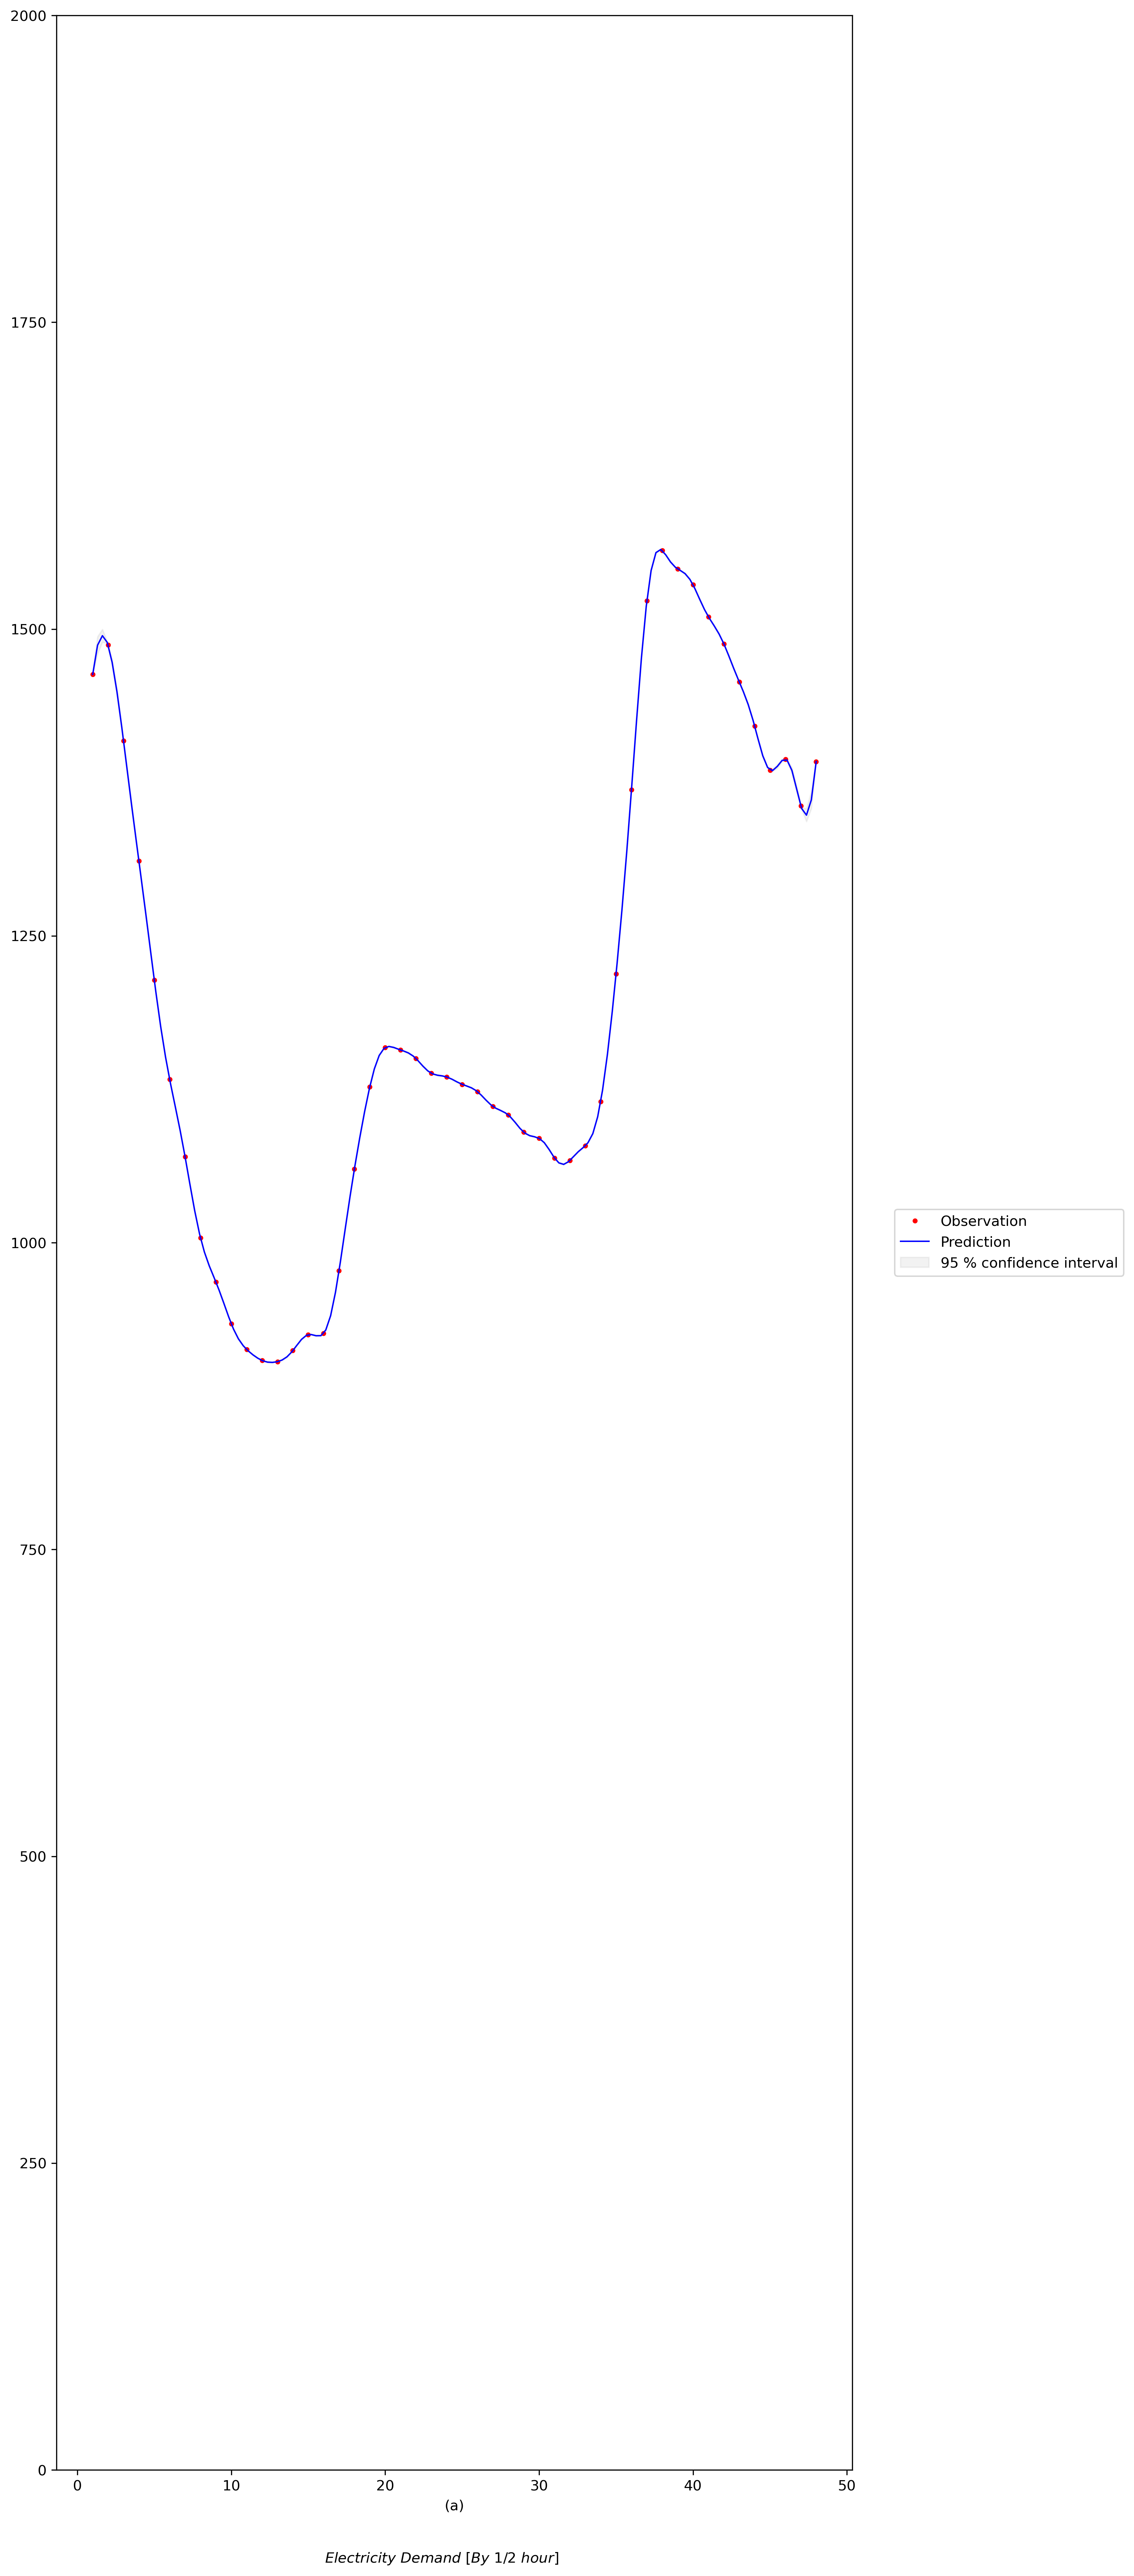

In [169]:
#Plot Figure 1
fig = plt.figure(num=1, figsize=(10,0.8), dpi=300, facecolor='w', edgecolor= 'k')
fig.text(0.5, -1, '$Electricity\ Demand\ [By\ 1/2\ hour]$', ha='center')

plt.subplot()
plt.plot(X, y[:,0], 'r.', markersize="5", label=u'Observation')
plt.plot(x, y_pred_1[:,0], 'b-',linewidth=1, label=u'Prediction')
plt.fill_between(x[:,0], y_pred_1[:,0] - 1.96*sigma_1, y_pred_1[:,0] + 1.96*sigma_1, alpha = 0.05, color='k', label=u'95 % confidence interval')
plt.xlabel('(a)')
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), fontsize=10)
plt.ylim(0,2000)

plt.subplots_adjust(top = 30)

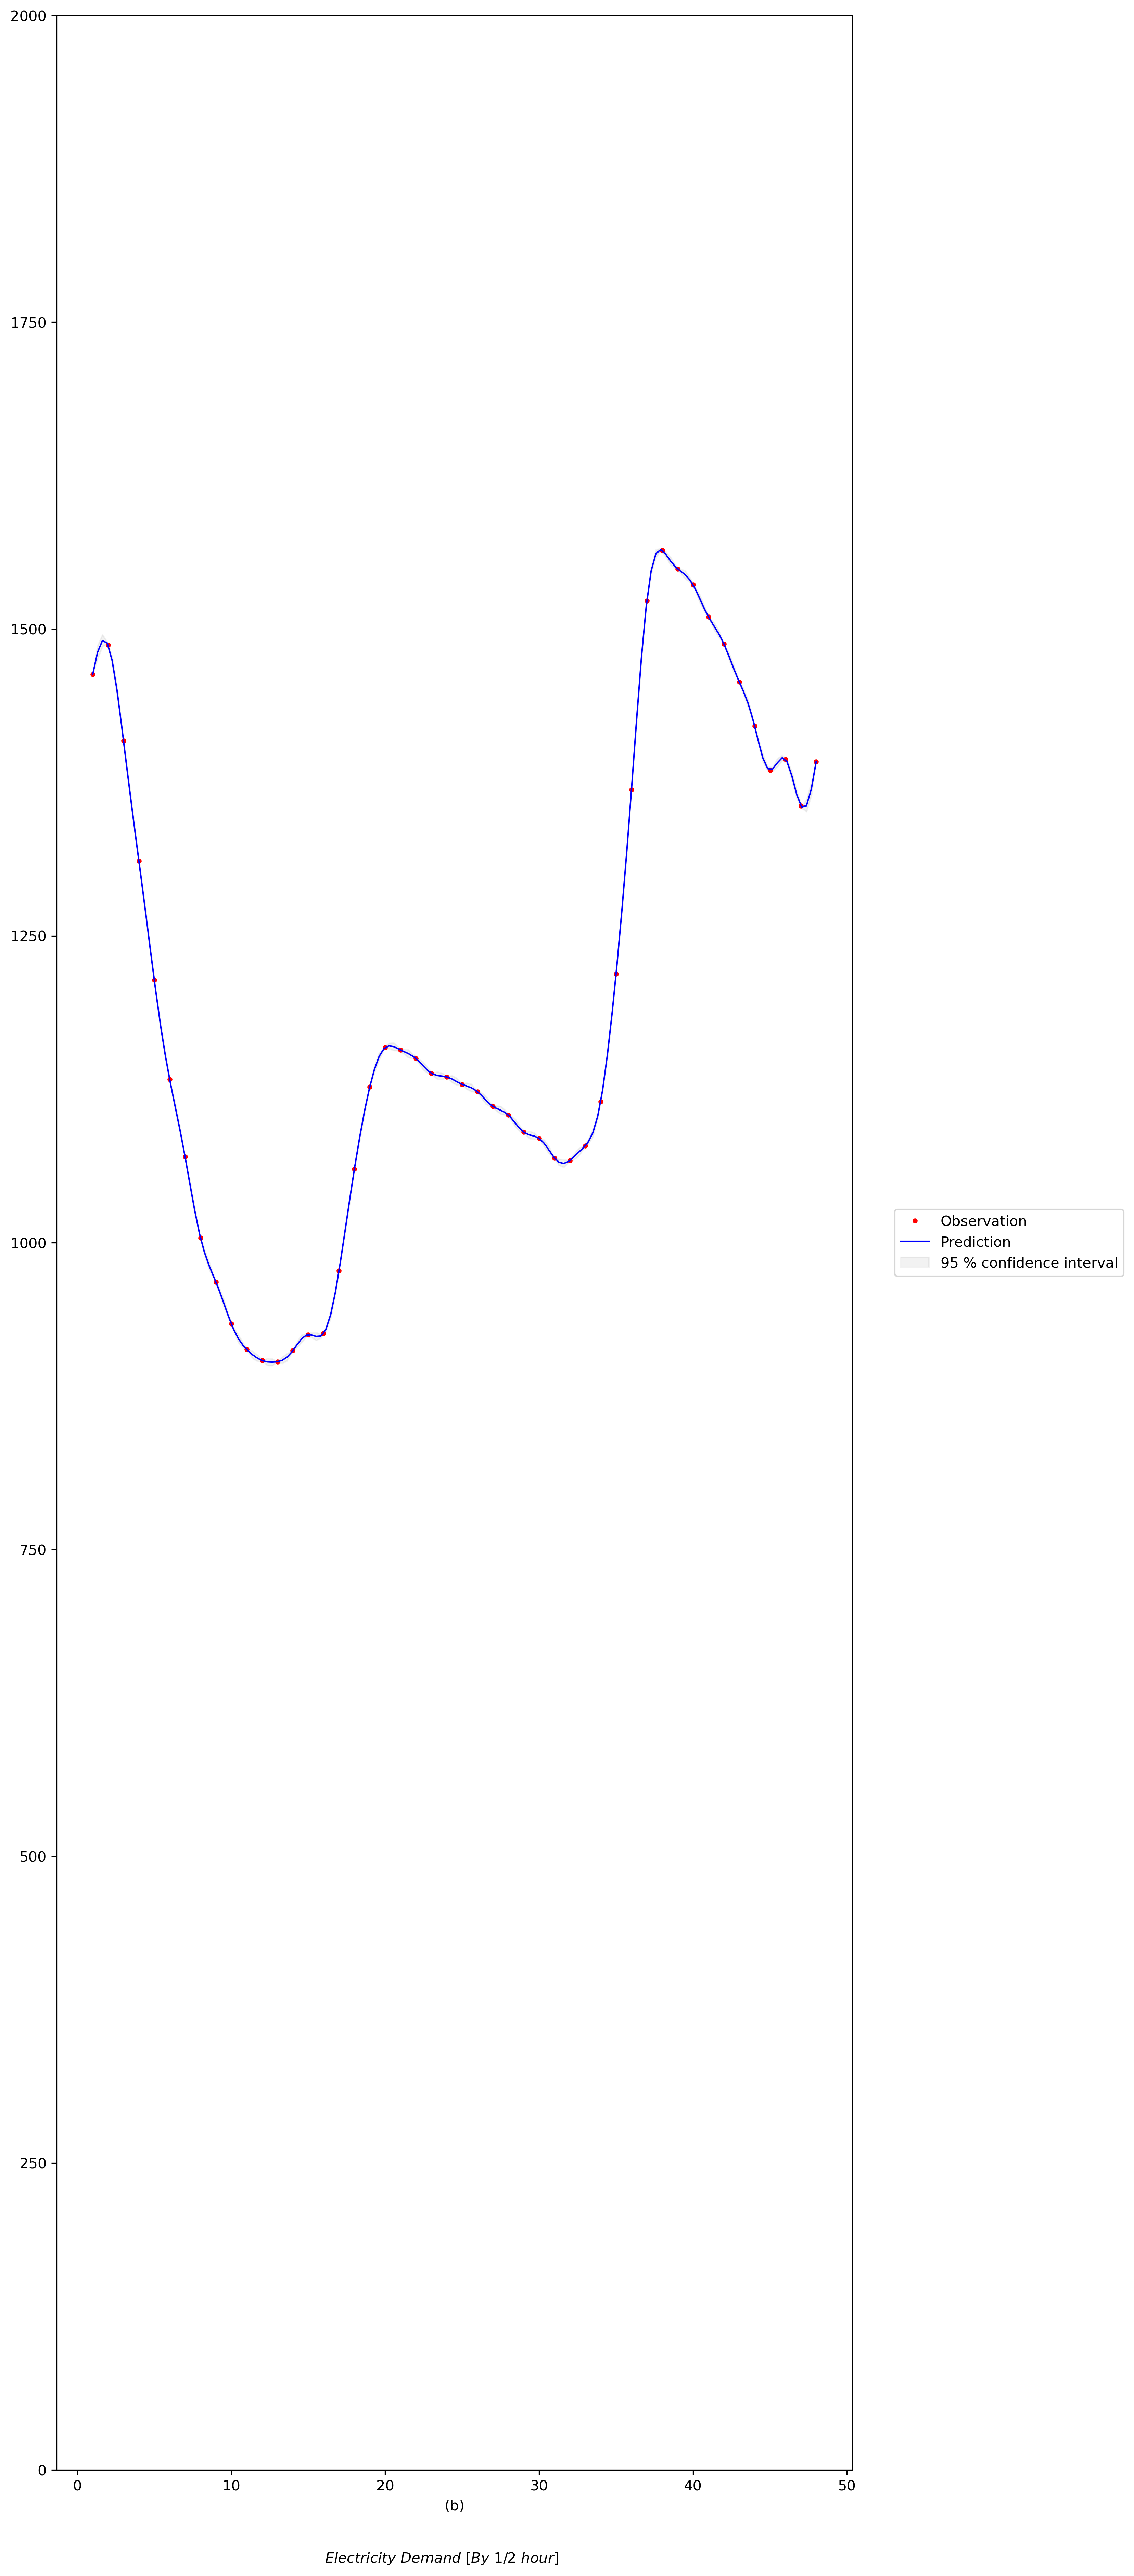

In [168]:
#Plot Figure 2
fig = plt.figure(num=1, figsize=(10,0.8), dpi=300, facecolor='w', edgecolor= 'k')
fig.text(0.5, -1, '$Electricity\ Demand\ [By\ 1/2\ hour]$', ha='center')

plt.subplot()
plt.plot(X, y[:,0], 'r.', markersize="5", label=u'Observation')
plt.plot(x, y_pred_2[:,0], 'b-',linewidth=1, label=u'Prediction')
plt.fill_between(x[:,0], y_pred_2[:,0] - 1.96*sigma_2, y_pred_2[:,0] + 1.96*sigma_2, alpha = 0.05, color='k', label=u'95 % confidence interval')
plt.xlabel('(b)')
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), fontsize=10)
plt.ylim(0,2000)

plt.subplots_adjust(top = 30)

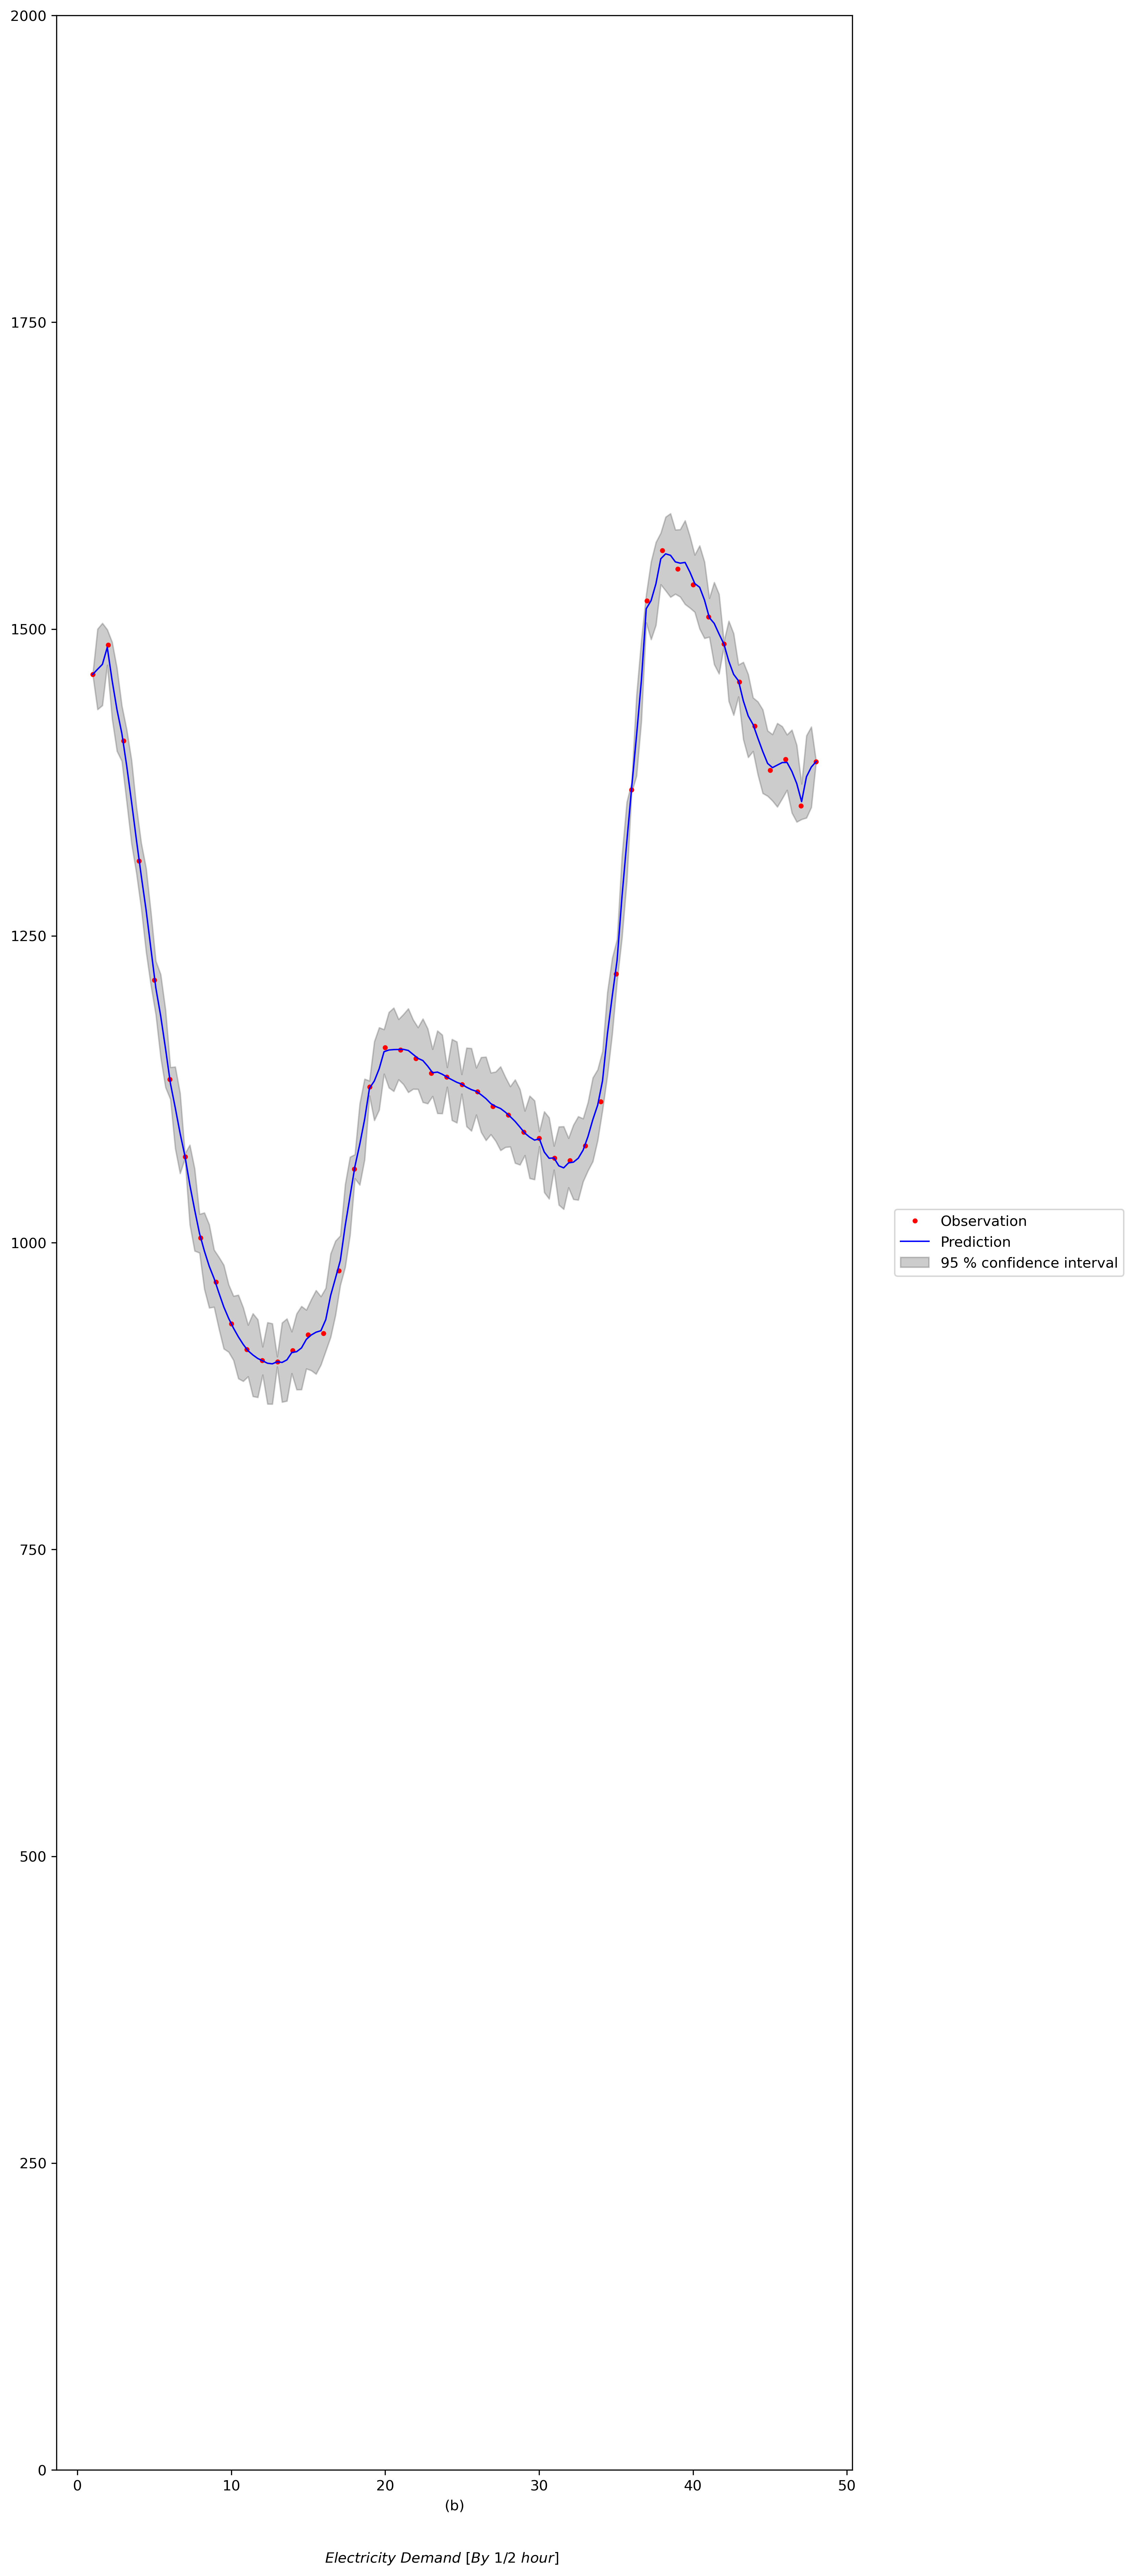

In [167]:
#Plot Figure 3
fig = plt.figure(num=1, figsize=(10,0.8), dpi=300, facecolor='w', edgecolor= 'k')
fig.text(0.5, -1, '$Electricity\ Demand\ [By\ 1/2\ hour]$', ha='center')

plt.subplot()
plt.plot(X, y[:,0], 'r.', markersize="5", label=u'Observation')
plt.plot(x, y_pred_3[:,0], 'b-',linewidth=1, label=u'Prediction')
plt.fill_between(x[:,0], y_pred_3[:,0] - 1.96*sigma_3, y_pred_3[:,0] + 1.96*sigma_3, alpha = 0.2, color='k', label=u'95 % confidence interval')
plt.xlabel('(b)')
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), fontsize=10)
plt.ylim(0,2000)

plt.subplots_adjust(top = 30)